In [1]:
datos = read.table("/home/emiliano/EstadisticaAplicada/Estadistica.Aplicada.2018/02_disenio_factorial_y_bloques/datos/C6P1datos.txt", header=TRUE)
attach(datos)
names(datos)
str(datos)

[1] "Base"    "Alcohol" "Porc"

'data.frame':	24 obs. of  3 variables:
 $ Base   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol: int  1 1 1 1 2 2 2 2 3 3 ...
 $ Porc   : num  91.3 89.9 90.7 91.4 89.3 88.1 90.4 91.4 89.5 87.6 ...


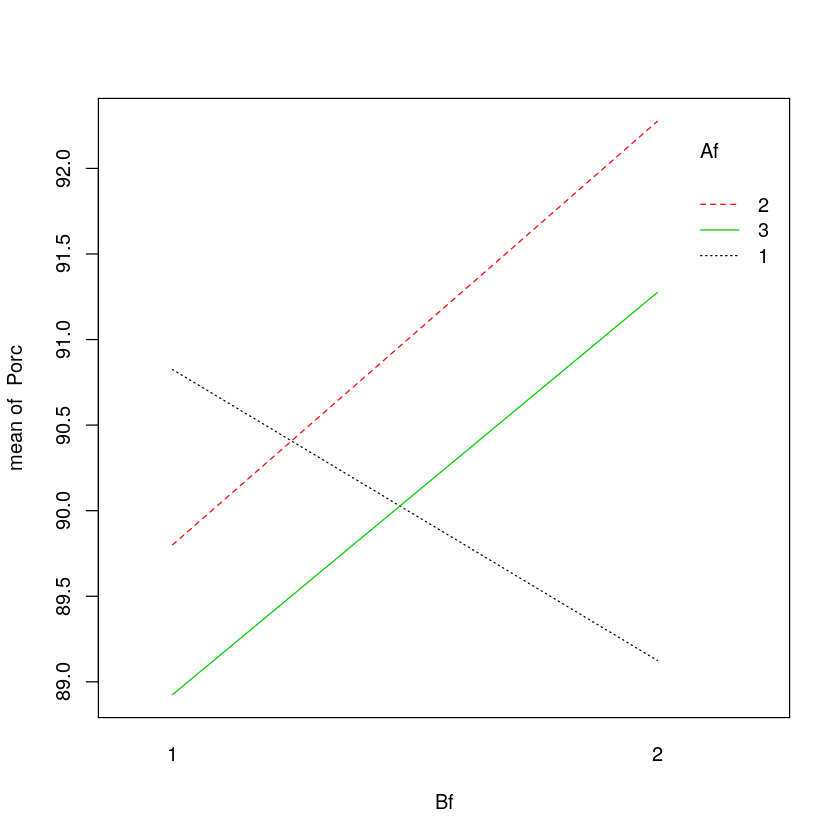

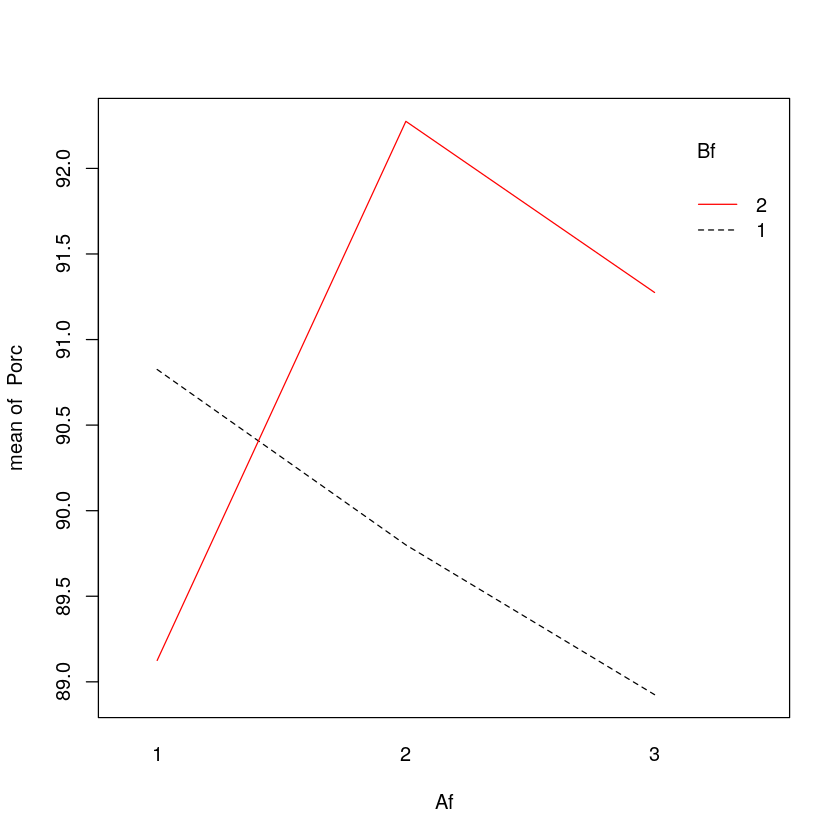

In [2]:
Bf = as.factor(Base)
Af = as.factor(Alcohol)

# Exploratorio
interaction.plot(Bf, Af, Porc, col=levels(Af))
interaction.plot(Af, Bf, Porc, col=levels(Bf))

Veremos un gráfico donde cada curva es pararme en un alcholol y moverme por una base 
la media que obtengo con la base 1 con la media que tengo con la base 2 cuando el alcohol es el 3 (verde)

Si no hubiera interacción **TODOS** deberían ser paralelos, si alguna se corta entonces CLARAMENTE hay una interacción.


Otro gráfica vemos como cambia la media para los distintos alcholes cuando la base es una u otra. Vemos como cambia el porcentaje de reacción, así que ahí también vemos interacción. También deberían dar paralelos si no hay interacción.

En la realidad no nos van a dar perfectamente paralelas pero al menos no se van a cortar abruptamente, eso significa que en la población podría no cumplirse.

            Df Sum Sq Mean Sq F value Pr(>F)  
Af           2   5.40   2.698   1.321 0.2915  
Bf           1   6.51   6.510   3.188 0.0910 .
Af:Bf        2  22.57  11.283   5.525 0.0135 *
Residuals   18  36.76   2.042                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

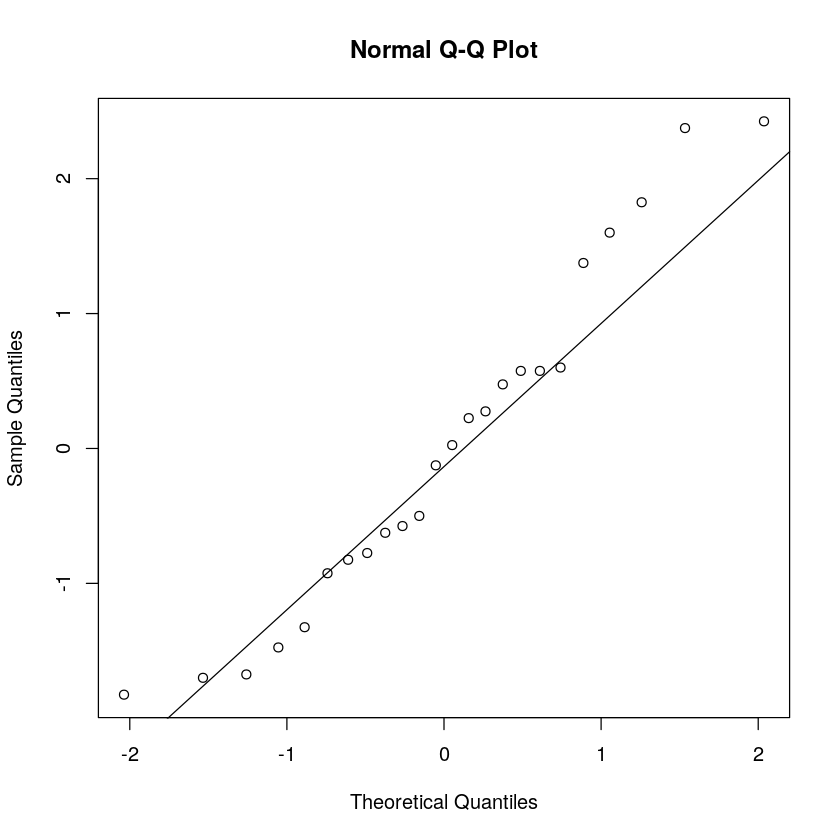


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.95049, p-value = 0.2777


ERROR: Error in leveneTest(modelo): could not find function "leveneTest"


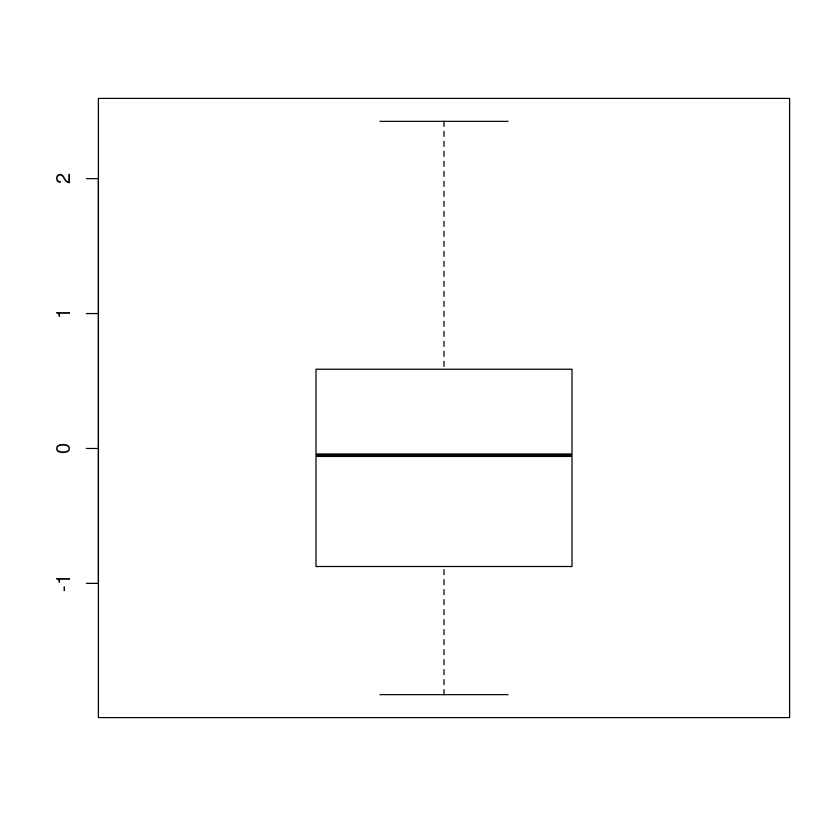

In [5]:
modelo = aov(Porc ~ Af*Bf)
summary(modelo)

# estan bien que los grados de libertad sean 18 en los residuos, porque tengo 3x2 combinaciones distintas, las 24 
# observaciones menos las 6 combinaciones (24-6 = 18)

# tengo que comprar los cuadrados medios con los cuadrados del error para ver el pvalor, 0.0135 entonces digo que
# tengo interaccion significativa pq el pvalor me dio chiquita, entonces no hago nada con lo otro porque no tiene
# sentido, asi que me voy derecho a chequear los residuos, que puedo hacer?

qqnorm(modelo$residuals)
qqline(modelo$residuals)
boxplot(modelo$residuals)

# hacemos los test, no tenemos evidencia
shapiro.test(modelo$residuals)
leveneTest(modelo)
outLierTest(modelo)

# no rechazo igualdad de varianzas ni normalidad, luego no hace falta transformar ni sacar outliers y confio en el resultado del anova

# ahora vamos a hacer los intervalos de confianza para las medias
library(lsmeans)
medias = lsmeans(modelo, ~Bf*Af)
print(medias)

# o lo mismo con
# fAB = paste(Af, Bf)
#  tapply(Porc, fAB, mean)

# las medias marginales no tienen sentido, rompemos todo, pero seria asi>
mediasB = lsmeans(modelo, ~Bf)
print(mediasB)
#tapply({prc ,Bf, mean})

# LO FUNDAMENTAL ES TESTEAR SI HAY INTERACCION, 
# SI NOS DA QUE NO SON SIGNIFICATIVAS QUE PODEMOS PROBAR, PQ TAL VEZ SI HAY INTERACCION, QUE PODRIA HACER
# PUEDO PREGUNTARME QUE POTENCIA TENGO